In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from collections import Counter


In [50]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                            n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=42)

counter = Counter(y)

print(f"Ratio of Y labels : {counter}")


Ratio of Y labels : Counter({np.int64(0): 990, np.int64(1): 10})


/tmp/ipykernel_136755/2880089200.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


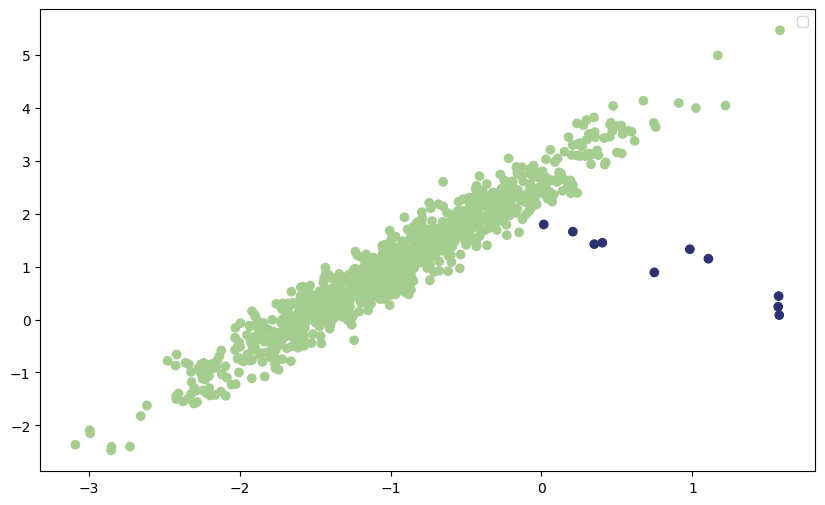

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="crest",)
plt.legend()
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [53]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(contamination=0.01)

In [54]:
# Fit on the majority class 

X_train_majority = X_train[y_train == 0]

iforest.fit(X_train_majority)


IsolationForest(contamination=0.01)

In [55]:
y_pred = iforest.predict(X_test)

In [56]:
# Mark inliner is 1 and outlier is -1

y_test_new = y_test.copy()

y_test_new[y_pred == 0] = 1
y_test_new[y_pred == 1] = -1  

In [64]:
from sklearn.metrics import roc_auc_score, classification_report, f1_score

roc_auc = roc_auc_score(y_test, y_pred)
cr_report = classification_report(y_test_new, y_pred, zero_division=0)

print(f"ROC_AUC Score : {roc_auc:.2f}%")
print(f"\nClassification Report\n: {cr_report}")


ROC_AUC Score : 0.51%

Classification Report
:               precision    recall  f1-score   support

          -1       0.00      0.00      0.00     195.0
           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     200.0
   macro avg       0.00      0.00      0.00     200.0
weighted avg       0.00      0.00      0.00     200.0

